In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import SMOTE 


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv('dataset/battles_cleaned.csv')

In [35]:
le = LabelEncoder()
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: le.fit_transform(x.astype(str)))
df.drop(columns=['battle_number','name','region','attacker_commander','defender_commander'],inplace=True)

In [36]:
y = df['attacker_outcome']
X = df.drop(columns='attacker_outcome')

In [37]:
np.random.seed(1772023)
impute_estimator = DecisionTreeRegressor(max_features='sqrt')
imputer = IterativeImputer(estimator=impute_estimator)

imputer.fit(X)
X_imp = imputer.transform(X)

In [38]:
np.random.seed(1772023)
sm = SMOTE(sampling_strategy=1,k_neighbors=2)

X_sm, y_sm = sm.fit_resample(X_imp, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (38, 16)
Shape of X after SMOTE: (66, 16)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: attacker_outcome, dtype: float64

In [53]:
# np.random.seed(1772023)
cv = StratifiedKFold(n_splits=5, random_state=1772023, shuffle=True)
 
pipeline = make_pipeline(StandardScaler(),RandomForestClassifier())

# evaluate pipeline
acc_scores =  cross_val_score(pipeline, X_sm, y_sm, scoring='accuracy', cv=cv, n_jobs=-1)
roc_auc_scores = cross_val_score(pipeline, X_sm, y_sm, scoring='roc_auc', cv=cv, n_jobs=-1)
f1_scores = cross_val_score(pipeline, X_sm, y_sm, scoring='f1', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f' % np.mean(acc_scores) + '\n' +
       'Mean ROC AUC: %.3f' % np.mean(roc_auc_scores) + '\n' +
       'Mean F1: %.3f' % np.mean(f1_scores))

Mean Accuracy: 0.985
Mean ROC AUC: 0.995
Mean F1: 0.985


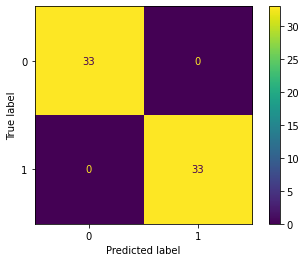

In [44]:
from sklearn.metrics import plot_confusion_matrix
np.random.seed(1772023)
model = make_pipeline(StandardScaler(),RandomForestClassifier())
model.fit(X_sm,y_sm)
plot_confusion_matrix(model,X_sm,y_sm) 

In [54]:
from sklearn.metrics import classification_report
np.random.seed(1772023)
y_preds = model.predict(X_sm)
report = classification_report(y_sm, y_preds)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66

